In [1]:
import pandas as pd
import csv
import obspy
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
csvfile = '/home/thompsong/src/Alexis_Montserrat_codes/ASNE_dailytraceid_wavfiles_df.csv'
df = pd.read_csv(csvfile)

In [2]:
print(df)

        Unnamed: 0  yyyymmdd         traceid  count
0             1664  19950727  MV.MWHE.--.SHX      0
1             1665  19950727  MV.MCPZ.--.SHZ      0
2             1666  19950727  MV.MHRN.--.SHX      0
3             1667  19950727  MV.MLGL.--.SHE      0
4             1668  19950727  MV.MHRN.--.SHY      0
5             1669  19950727  MV.MVOV.--.SHY      0
6             1670  19950727  MV.MJHL.--.SHZ      0
7             1671  19950727  MV.MSSE.--.SHX      0
8             1672  19950727  MV.MWZL.--.SHZ      0
9             1673  19950727  MV.MVOE.--.SHZ      0
10            1674  19950727  MV.MPEW.--.SHE      2
11            1675  19950727  MV.MVPE.--.SHE      0
12            1676  19950727  MV.MCPZ.--.SHY      0
13            1677  19950727  MV.MVON.--.SHX      0
14            1678  19950727  MV.MCHT.--.SHZ      0
15            1679  19950727  MV.MPLY.--.SHN      1
16            1680  19950727  MV.MPVE.--.SHZ      2
17            1681  19950727  MV.MWHE.--.SHY      0
18          

In [8]:
print(sorted(df.traceid.unique()))

['MV.IRIG.--.THE', 'MV.LONG.--.SHE', 'MV.MBET.--.SHZ', 'MV.MCHT.--.SHZ', 'MV.MCPE.--.SHX', 'MV.MCPN.--.SHY', 'MV.MCPN.--.SHZ', 'MV.MCPT.--.SHZ', 'MV.MCPZ.--.SHY', 'MV.MCPZ.--.SHZ', 'MV.MGAT.--.SHZ', 'MV.MGHZ.--.SHZ', 'MV.MGT2.--.SHZ', 'MV.MHRE.--.SHX', 'MV.MHRE.--.SHZ', 'MV.MHRN.--.SHX', 'MV.MHRN.--.SHY', 'MV.MHRV.--.SHY', 'MV.MHRV.--.SHZ', 'MV.MJHL.--.SHZ', 'MV.MJHT.--.SHZ', 'MV.MLGL.--.SHE', 'MV.MLGL.--.SHZ', 'MV.MLGT.--.SHZ', 'MV.MLYT.--.SHZ', 'MV.MNEV.--.SHZ', 'MV.MPEW.--.SHE', 'MV.MPEW.--.SHZ', 'MV.MPLX.--.SHE', 'MV.MPLY.--.SHN', 'MV.MPLZ.--.SHZ', 'MV.MPNS.--.SHN', 'MV.MPVE.--.SHZ', 'MV.MRHT.--.SHZ', 'MV.MRYT.--.SHZ', 'MV.MSAT.--.SHZ', 'MV.MSPT.--.SHZ', 'MV.MSSE.--.SHX', 'MV.MSSN.--.SHY', 'MV.MSSZ.--.SHZ', 'MV.MVOE.--.SHZ', 'MV.MVON.--.SHX', 'MV.MVOV.--.SHY', 'MV.MVPE.--.SHE', 'MV.MVPE.--.SHX', 'MV.MVPN.--.SHY', 'MV.MVPV.--.SHZ', 'MV.MVPZ.--.SHZ', 'MV.MWEH.--.SHX', 'MV.MWEL.--.SHX', 'MV.MWH2.--.SHZ', 'MV.MWHE.--.SHE', 'MV.MWHE.--.SHX', 'MV.MWHE.--.SHY', 'MV.MWHN.--.SHN', 'MV.MWHN.

In [50]:
def translate_id2site(id):
    thissite = id[4:6]
    if id[3:7]=='LONG':
        thissite = 'LG'
    if id[3:5]=='MW':
        thissite = 'WH'
    if id[3:6]=='MVO':
        thissite = 'MVO'
    if id[4:7]=='NEV':
        thissite = 'NEV'
    if id[3:5]=='MP':
        thissite = 'PL'
    if id[3:6]=='MCH':
        thissite = 'CP'
    if id[3:7]=='IRIG' or id[3:7]=='TST1' or id[3:6]=='MRH':
        thissite = ''
    return thissite    

In [51]:
uniqids = df.traceid.unique()
sites = set()
for id in uniqids:
    thissite = translate_id2site(id)
    if not thissite:
        continue
    sites.add(thissite)
sites = sorted(sites)
print(sites)

['BE', 'CP', 'GA', 'GH', 'GT', 'HR', 'JH', 'LG', 'LY', 'MVO', 'NEV', 'PL', 'RY', 'SA', 'SP', 'SS', 'VP', 'WH']


In [52]:
# loop over rows in df, and create a new dataframe for sites, with a 1 to indicate if on for each day
sites_df = pd.DataFrame(columns = ['date'] + sorted(sites))
for index, row in df.iterrows():
    thisdate = row['yyyymmdd']
    thissite = translate_id2site(row['traceid'])
    if not thissite:
        continue
    thiscount = row['count']
    if np.isnan(thiscount):
        thiscount = 0
    currentcount = 0
    try:
        currentcount = sites_df.at[thisdate,thissite]
    except:
        pass
    if np.isnan(currentcount):
        currentcount = 0
    if thiscount > currentcount:
        sites_df.at[thisdate,thissite] = thiscount
print(sites_df)

         date   BE   CP   GA   GH   GT   HR   JH   LG   LY  MVO  NEV   PL  \
19950727  NaN    3  NaN    2    3  NaN  NaN  NaN    2  NaN  NaN  NaN    2   
19950728  NaN   50  NaN   50   50  NaN  NaN  NaN   40  NaN  NaN  NaN   50   
19950729  NaN   47  NaN   47   47  NaN  NaN  NaN   47  NaN  NaN  NaN   47   
19950730  NaN   20  NaN   20   20  NaN  NaN  NaN   20  NaN  NaN  NaN   20   
19950731  NaN   14  NaN   14   14  NaN  NaN  NaN   14  NaN  NaN  NaN   14   
19950801  NaN   15  NaN   15   15  NaN  NaN  NaN   15  NaN  NaN  NaN   15   
19950802  NaN   17  NaN   17   17  NaN  NaN  NaN   17  NaN  NaN  NaN   17   
19950803  NaN   11  NaN   11   11  NaN  NaN  NaN   11  NaN  NaN  NaN   11   
19950804  NaN   22  NaN   22   22  NaN  NaN  NaN   22  NaN  NaN  NaN   22   
19950805  NaN  157  NaN  157  157  NaN  NaN  NaN  157  NaN  NaN  NaN  157   
19950806  NaN  148  NaN  148  148  NaN  NaN  NaN  148  NaN  NaN  NaN  148   
19950807  NaN   39  NaN   39   39  NaN  NaN  NaN   39  NaN  NaN  NaN   39   

In [53]:
sites_bool_df = (sites_df > 0) * 1

In [54]:
data = np.array(sites_bool_df, dtype=float) # convert dataframe to numpy array
data = 1-data[:,1:] # remove 'date' column which for some reason is empty
print(data.shape)

(2714, 18)


In [55]:
# Set labels for ontime plot
xticklabels = sites
yticklabels = []
yticks=[]
i = 0
for index, row in sites_bool_df.iterrows():
    date = str(index)
    if date[-2:]=='01':
        yticklabels.append(date)
        yticks.append(i)
    i+=1
ystep = 1
if len(yticks)>15:
    ystep=2
if len(yticks)>25:
    ystep=3
if len(yticks)>40:
    ystep=4
if len(yticks)>60:
    ystep=6
if len(yticks)>120:
    ystep=12    
yticks = yticks[0::ystep]
yticklabels = yticklabels[0::ystep]
print(yticklabels)

['19950801', '19960501', '19961101', '19970501', '19971101', '19980501', '19981201', '19990701', '20000101', '20000801', '20010201', '20010801', '20020301', '20020901', '20030601', '20031201']


Text(0.5,6.8,'Site')

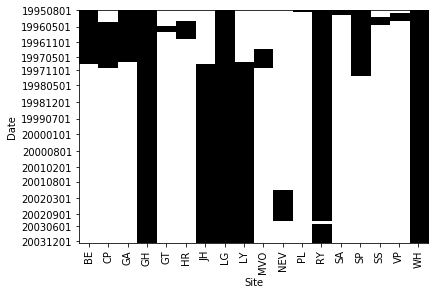

In [56]:
# make ontime plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data, aspect='auto', cmap=plt.cm.gray, interpolation='nearest')
plt.xticks(np.arange(len(xticklabels)), xticklabels)
ax.set_xticklabels(xticklabels, rotation = 90)
plt.yticks(yticks, yticklabels)
plt.tight_layout()
plt.savefig('ASNE_siteontime.png',dpi=200)
plt.ylabel('Date')
plt.xlabel('Site')

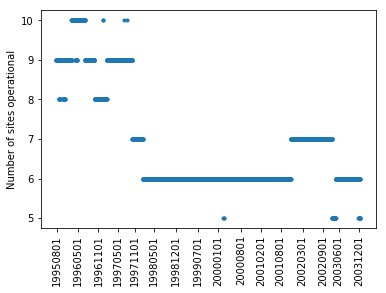

In [57]:
# make number of stations operational per day plot
fig = plt.figure()
ax = fig.add_subplot(111)
s = np.sum(1-data,axis=1)
plt.plot(s,'.')
plt.xticks(yticks, yticklabels)
ax.set_xticklabels(yticklabels, rotation = 90)
plt.ylabel('Number of sites operational')
plt.savefig('ASNE_numsitesperday.png',dpi=200)

(2714, 18)
(2714,)


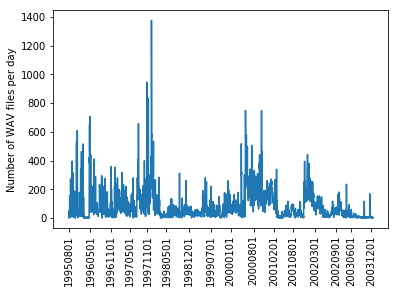

In [58]:
# make number of WAVfiles per day plot
fig = plt.figure()
ax = fig.add_subplot(111)
data2 = np.array(sites_df) # convert dataframe to numpy array
data2 = data2[:,1:] # remove 'date' column which for some reason is empty
print(data2.shape)
y = np.nanmax(data2,axis=1)
print(y.shape)
plt.plot(y)
plt.xticks(yticks, yticklabels)
ax.set_xticklabels(yticklabels, rotation = 90)
plt.ylabel('Number of WAV files per day')
#plt.ylim(-5,10)
plt.savefig('ASNE_numwavfilesperday.png',dpi=200)

In [43]:
print(np.sum(y))

229430.0
